# Autoregression_Models (AR)

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

---



In [3]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from statsmodels.tsa.ar_model import AutoReg
from bokeh.layouts import row, column

## Dataset 1: 1-hour-load-data

In [9]:
dataset = pd.read_excel('/content/2-day-load-data.xlsx', parse_dates=True)
dataset

,date,MW
0,2017-01-01,3536.238770
1,2017-01-02,3639.738770
2,2017-01-03,3673.321289
3,2017-01-04,3898.860840
4,2017-01-05,3547.965820
...,...,...
1090,2019-12-27,4976.180664
1091,2019-12-28,4708.879395
1092,2019-12-29,4831.750488
1093,2019-12-30,5298.331055


In [14]:
df = dataset.loc[ dataset['date'].dt.year < 2019 ]
test_df = dataset.loc[ dataset['date'].dt.year >= 2019 ]

In [16]:
x = df['date'][:600]
y = df['MW'][:600]

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y, legend_label="Visualisation", line_width=1)
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
output_notebook()
show(p)

In [17]:
x = df['date']
y = df['MW']

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y, legend_label="Visualisation", line_width=1)
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
show(p)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df, model="additive")
decompose_data.plot();

TypeError: ignored

In [ ]:
df = df.set_index("DATE")
X = df.values
X

array([[1815.57104492],
       [1576.69958496],
       [1428.96789551],
       ...,
       [2986.58666992],
       [2759.50366211],
       [2449.92749023]])

**Check for Stationality**





In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['MW'], autolag='AIC')

print("1: ADF: ", dftest[0])
print("2: P-Value: ", dftest[1])
print("3: Number of Observations used for ADF Regression and Critical Value Calculation: ", dftest[3])
print("Critical Values:")

for key, value in dftest[4].items():
	print('\t%s: %.3f' % (key, value))

1: ADF:  -2.846996207595486
2: P-Value:  0.05186792621334464
3: Number of Observations used for ADF Regression and Critical Value Calculation:  17475
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


* pacf => Partial Correlation - Direct effect of a particular time period to current time period
* acf => Partial Correlation - Indirect effect of a particular time period to current time period 

It tells how correlated different time period are

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


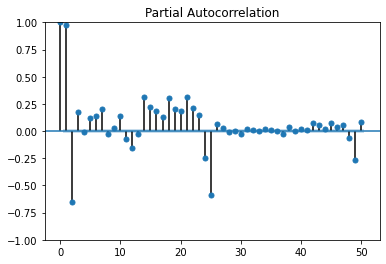

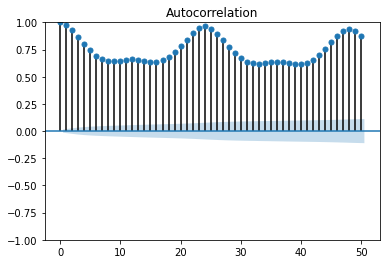

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['MW'], lags=50)
acf = plot_acf(df['MW'], lags=50)

In [ ]:
df.tail()

,MW
DATE,
2018-12-31 19:00:00,3457.717041
2018-12-31 20:00:00,3234.647705
2018-12-31 21:00:00,2986.586670
2018-12-31 22:00:00,2759.503662
2018-12-31 23:00:00,2449.927490


> **Splitting dataset into train and test**
---
Assumptions:
> - Here we are using entire data of X(till 2019) as our training data
> - The value of lags is subjected to change




In [ ]:
model = AutoReg(df, lags=24).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


No handles with labels found to put in legend.


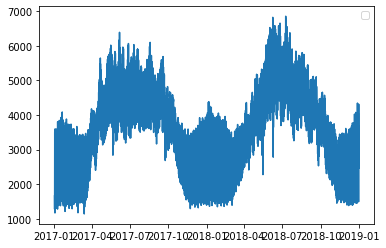

In [ ]:
fig = model.plot_predict()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                     MW   No. Observations:                17520
Model:                    AutoReg(24)   Log Likelihood             -108675.882
Method:               Conditional MLE   S.D. of innovations            120.606
Date:                Tue, 11 Jan 2022   AIC                         217403.764
Time:                        04:39:44   BIC                         217605.777
Sample:                    01-02-2017   HQIC                        217470.287
                         - 12-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6233      3.482      2.190      0.029       0.799      14.447
MW.L1          1.3046      0.007    178.133      0.000       1.290       1.319
MW.L2         -0.5541      0.012    -47.076      0.0

In [ ]:
pred = model.predict(start=len(df), end=len(dataset)-1, dynamic=False)
pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


2019-01-01 00:00:00    2098.999611
2019-01-01 01:00:00    1723.447606
2019-01-01 02:00:00    1577.502500
2019-01-01 03:00:00    1528.207332
2019-01-01 04:00:00    1520.795361
                          ...     
2019-12-31 19:00:00    3693.004960
2019-12-31 20:00:00    3693.009033
2019-12-31 21:00:00    3693.013104
2019-12-31 22:00:00    3693.017173
2019-12-31 23:00:00    3693.021240
Freq: H, Length: 8760, dtype: float64

In [ ]:
# pred and test

x = test_df['DATE']
y1 = test_df['MW']
y2 = pred

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Visualisation", line_width=1)
p.line(x, y2, legend_label="Visualisation", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

**Calculate Error**

In [ ]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# rmse = sqrt(mean_squared_error(<test data>, <pred data>))
# print(rmse)

## Dataset 2: 2-day-load-data

In [ ]:
df = pd.read_excel('/content/2-day-load-data.xlsx')
df

,date,MW
0,2017-01-01,3536.238770
1,2017-01-02,3639.738770
2,2017-01-03,3673.321289
3,2017-01-04,3898.860840
4,2017-01-05,3547.965820
...,...,...
1090,2019-12-27,4976.180664
1091,2019-12-28,4708.879395
1092,2019-12-29,4831.750488
1093,2019-12-30,5298.331055


In [ ]:
x = df['date'][:600]
y = df['MW'][:600]

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y, legend_label="Visualisation", line_width=1)
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
output_notebook()
show(p)


In [ ]:
x = df['date']
y = df['MW']

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y, legend_label="Visualisation", line_width=1)
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
show(p)

In [ ]:
df = df.set_index("date")
X = df.values
X

array([[3536.23876953],
       [3639.73876953],
       [3673.32128906],
       ...,
       [4831.75048828],
       [5298.33105469],
       [5244.52783203]])

**Check for Stationality**




In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['MW'], autolag='AIC')

print("1: ADF: ", dftest[0])
print("2: P-Value: ", dftest[1])
print("3: Number of Observations used for ADF Regression and Critical Value Calculation: ", dftest[3])
print("Critical Values:")

for key, value in dftest[4].items():
	print('\t%s: %.3f' % (key, value))

1: ADF:  -2.4479886639880264
2: P-Value:  0.1286473201798814
3: Number of Observations used for ADF Regression and Critical Value Calculation:  1073
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


* pacf => Partial Correlation - Direct effect of a perticular time period to current time period
* acf => Partial Correlation - Indirect effect of a perticular time period to current time period 

It tells how correlated different time period are

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


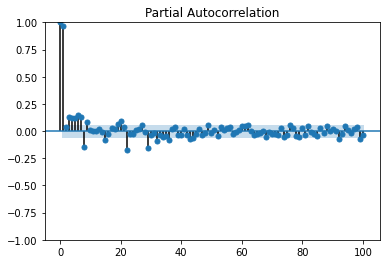

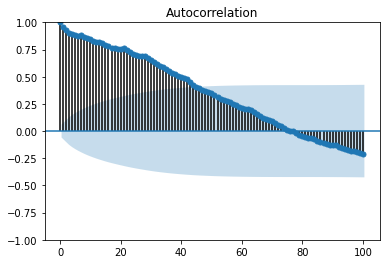

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['MW'], lags=100)
acf = plot_acf(df['MW'], lags=100)

In [ ]:
df.tail()

,MW
date,
2019-12-27,4976.180664
2019-12-28,4708.879395
2019-12-29,4831.750488
2019-12-30,5298.331055
2019-12-31,5244.527832


> **Splitting dataset into train and test**
---
Assumptions:
> - Here we are using entire data of X(till 2019) as our training data
> - The value of lags is subjected to change




In [ ]:
train = X

In [ ]:
model = AutoReg(train, lags=2).fit()

No handles with labels found to put in legend.


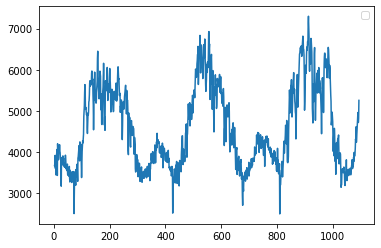

In [ ]:
fig = model.plot_predict()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1095
Model:                     AutoReg(2)   Log Likelihood               -7702.657
Method:               Conditional MLE   S.D. of innovations            278.195
Date:                Thu, 16 Dec 2021   AIC                          15413.315
Time:                        04:40:03   BIC                          15433.301
Sample:                             2   HQIC                         15420.878
                                 1095                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.0674     38.947      4.315      0.000      91.733     244.402
y.L1           0.9224      0.030     30.523      0.000       0.863       0.982
y.L2           0.0413      0.030      1.366      0.1

## Dataset 3: 3-hour-load-data-weather

In [ ]:
df = pd.read_excel('/content/3-hour-load-weather-data.xlsx')
df

FileNotFoundError: ignored

In [ ]:
x1 = df['DATE']
y = df['MW']

p1 = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p1.line(x1, y, legend_label="Visualisation", line_width=1)
p1.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

x2 = df['max-temp']
p2 = figure(title="Max Temp vs MW", 
           sizing_mode="stretch_width",
           x_axis_label='Max Temp',
           y_axis_label='MW')

p2.line(x2, y, legend_label="Visualisation", line_width=1)


x3 = df['min-temp']
p3 = figure(title="Min Temp vs MW", 
           sizing_mode="stretch_width",
           x_axis_label='Min Temp',
           y_axis_label='MW')

p3.line(x3, y, legend_label="Visualisation", line_width=1)

x4 = df['RH-0830']
p4 = figure(title="RH-0830 vs MW", 
           sizing_mode="stretch_width",
           x_axis_label='RH-0830',
           y_axis_label='MW')

p4.line(x4, y, legend_label="Visualisation", line_width=1)


x5 = df['RH-1730']
p5 = figure(title="RH-1730 vs MW", 
           sizing_mode="stretch_width",
           x_axis_label='RH-1730',
           y_axis_label='MW')

p5.line(x5, y, legend_label="Visualisation", line_width=1)


In [ ]:
# put the results in a row and show
show(column(p1, p2, p3, p4, p5))

In [ ]:
df = df.set_index("date")
X = df.values
X

**Check for Stationality**




In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['MW'], autolag='AIC')

print("1: ADF: ", dftest[0])
print("2: P-Value: ", dftest[1])
print("3: Number of Observations used for ADF Regression and Critical Value Calculation: ", dftest[3])
print("Critical Values:")

for key, value in dftest[4].items():
	print('\t%s: %.3f' % (key, value))

* pacf => Partial Correlation - Direct effect of a perticular time period to current time period
* acf => Partial Correlation - Indirect effect of a perticular time period to current time period 

It tells how correlated different time period are

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['MW'], lags=100)
acf = plot_acf(df['MW'], lags=100)

In [ ]:
df.tail()

> **Splitting dataset into train and test**
---
Assumptions:
> - Here we are using entire data of X(till 2019) as our training data
> - The value of lags is subjected to change




In [ ]:
train = X

In [ ]:
model = AutoReg(train, lags=2).fit()

In [ ]:
fig = model.plot_predict()

In [ ]:
print(model.summary())